## Entanglement

https://nbviewer.jupyter.org/github/QISKit/qiskit-tutorial/blob/stable/2_quantum_information/superposition_and_entanglement.ipynb

In [1]:
# dependencies
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pprint import pprint

# importing the QISKit
from qiskit import QuantumProgram
import Qconfig

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [4]:
backend = 'ibmqx2'
shots = 1024

qp = QuantumProgram()
qp.set_api(Qconfig.APIToken, Qconfig.config["url"])

# create the quantum and classical registers with two bits
quantumRegister = qp.create_quantum_register("quantumRegister", 2)
classicalRegister = qp.create_classical_register("classicalRegister", 2)

# make a quantum circuit to create an entangled bell state
bell = qp.create_circuit("bell", [quantumRegister], [classicalRegister])
bell.h(quantumRegister[0])
bell.cx(quantumRegister[0], quantumRegister[1])

# make a quantum circuit to measure the q0 in the standard basis
measureIZ = qp.create_circuit("measureIZ", [quantumRegister], [classicalRegister])
measureIZ.measure(quantumRegister[0], classicalRegister[0])

# make a quantum circuit to measure q0 in the superposition basis
measureIX = qp.create_circuit("measureIX", [quantumRegister], [classicalRegister])
measureIX.h(quantumRegister[0])
measureIX.measure(quantumRegister[0], classicalRegister[0])

# make a quantum circuit to measure q1 in the standard basis
measureZI = qp.create_circuit("measureZI", [quantumRegister], [classicalRegister])
measureZI.measure(quantumRegister[1], classicalRegister[1])

# make a quantum circuit to measure q1 in the superposition basis
measureXI = qp.create_circuit("measureXI", [quantumRegister], [classicalRegister])
measureXI.h(quantumRegister[1])
measureXI.measure(quantumRegister[1], classicalRegister[1])

# make a quantum circuit to measure q in the standard basis
measureZZ = qp.create_circuit("measureZZ", [quantumRegister], [classicalRegister])
measureZZ.measure(quantumRegister[0], classicalRegister[0])
measureZZ.measure(quantumRegister[1], classicalRegister[1])

# make a quantum circuit to measure q in the superposition basis
measureXX = qp.create_circuit("measureXX", [quantumRegister], [classicalRegister])
measureXX.h(quantumRegister[0])
measureXX.h(quantumRegister[1])
measureXX.measure(quantumRegister[0], classicalRegister[0])
measureXX.measure(quantumRegister[1], classicalRegister[1])

In [5]:
qp.add_circuit("bell_measureIZ", bell+measureIZ)
qp.add_circuit("bell_measureIX", bell+measureIZ)
qp.add_circuit("bell_measureZI", bell+measureZI)
qp.add_circuit("bell_measureXI", bell+measureXI)
qp.add_circuit("bell_measureZZ", bell+measureZZ)
qp.add_circuit("bell_measureXX", bell+measureXX)

circuits = ["bell_measureIZ", "bell_measureIX", "bell_measureZI", "bell_measureXI", "bell_measureZZ", "bell_measureXX"]
qp.get_qasms(circuits)

['OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg quantumRegister[2];\ncreg classicalRegister[2];\nh quantumRegister[0];\ncx quantumRegister[0],quantumRegister[1];\nmeasure quantumRegister[0] -> classicalRegister[0];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg quantumRegister[2];\ncreg classicalRegister[2];\nh quantumRegister[0];\ncx quantumRegister[0],quantumRegister[1];\nmeasure quantumRegister[0] -> classicalRegister[0];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg quantumRegister[2];\ncreg classicalRegister[2];\nh quantumRegister[0];\ncx quantumRegister[0],quantumRegister[1];\nmeasure quantumRegister[1] -> classicalRegister[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg quantumRegister[2];\ncreg classicalRegister[2];\nh quantumRegister[0];\ncx quantumRegister[0],quantumRegister[1];\nh quantumRegister[1];\nmeasure quantumRegister[1] -> classicalRegister[1];\n',
 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg quantumRegister[2];\ncreg classicalRegister[2];\nh quantumRegister[0

running on backend: ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)


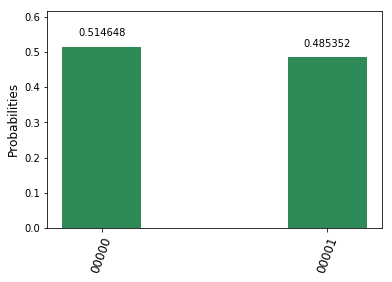

In [7]:
result = qp.execute(circuits[0:2], backend=backend, shots=shots, max_credits=3, wait=10, timeout=240, silent=False)
plot_histogram(result.get_counts("bell_measureIZ"))

In [8]:
result.get_data("bell_measureIZ")

{'counts': {'00000': 527, '00001': 497},
 'date': '2017-12-19T18:47:47.555Z',
 'time': 17.44787907600403}

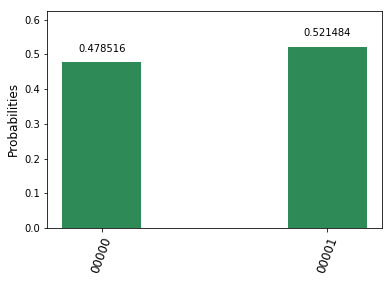

In [9]:
plot_histogram(result.get_counts("bell_measureIX"))

running on backend: ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)


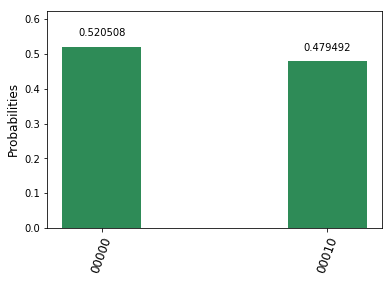

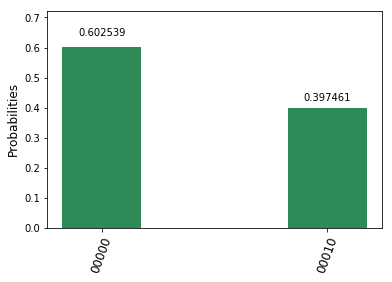

In [10]:
result = qp.execute(circuits[2:4], backend=backend, shots=shots, max_credits=3, wait=10, timeout=240, silent=False)
plot_histogram(result.get_counts("bell_measureZI"))
plot_histogram(result.get_counts("bell_measureXI"))

In [11]:
result = qp.execute(circuits[4:6], backend=backend, shots=shots, max_credits=3, wait=10, timeout=240, silent=False)

running on backend: ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)


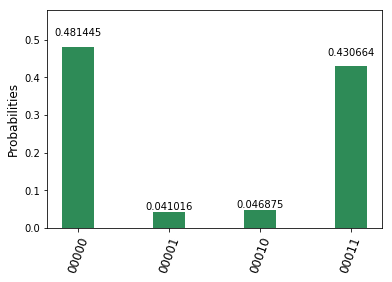

In [12]:
plot_histogram(result.get_counts("bell_measureZZ"))

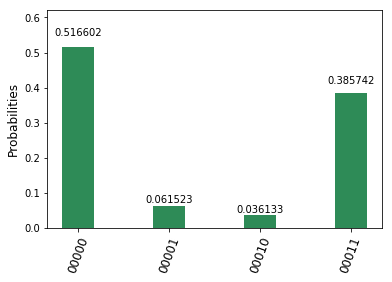

In [13]:
plot_histogram(result.get_counts("bell_measureXX"))

running on backend: ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)


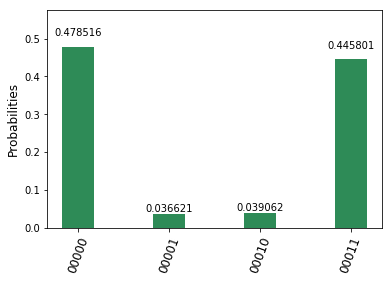

In [15]:
# we're making sure that we're acutally entangled
# so redefine the registers with 2 qubits each
quantumRegister = qp.create_quantum_register("quantumRegister", 2)
classicalRegister = qp.create_classical_register("classicalRegister", 2)

# make a quantum circuit to make a mixed state
mixed1 = qp.create_circuit("mixed1", [quantumRegister], [classicalRegister])
mixed2 = qp.create_circuit("mixed2", [quantumRegister], [classicalRegister])
mixed2.x(quantumRegister)
mixed1.measure(quantumRegister[0], classicalRegister[1])
mixed1.measure(quantumRegister[1], classicalRegister[1])
mixed2.measure(quantumRegister[0], classicalRegister[0])
mixed2.measure(quantumRegister[1], classicalRegister[1])
mixed_state = ["mixed1", "mixed2"]
result = qp.execute(mixed_state, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240, silent=False)
counts1 = result.get_counts(mixed_state[0])
counts2 = result.get_counts(mixed_state[1])
from collections import Counter
ground = Counter(counts1)
excited = Counter(counts2)
plot_histogram(ground+excited)